In [1]:
%matplotlib inline

import os
import warnings
import sys
import time
from typing import Any
import time
import copy
import random
from dataclasses import dataclass

import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import matplotlib
from IPython.display import clear_output

def custom_breakpointhook(*args, **kwargs):
    from IPython.core.debugger import set_trace; set_trace(*args, **kwargs)
sys.breakpointhook = custom_breakpointhook


# def add(path):
#     if path not in sys.path:
#         sys.path.append(path)
# add("/Users/dsweet2/Jupyter/")
# add("/Users/dsweet2/Projects/bbo/")


import analysis.data_sets as ads
import analysis.plotting as ap
%load_ext autoreload
%autoreload 1
%aimport analysis.data_sets
%aimport analysis.plotting

import warnings
warnings.filterwarnings('ignore')

/home/juju/.local/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import sys
sys.path

['/home/juju/projects/bbo',
 '/home/juju/miniconda3/envs/bbo/lib/python310.zip',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10/lib-dynload',
 '',
 '/home/juju/.local/lib/python3.10/site-packages',
 '/home/juju/miniconda3/envs/bbo/lib/python3.10/site-packages']

In [3]:
# NB: beta=0, so even though these use "msvar", it's really just "mvar"

In [4]:
# def data_locator(exp_tag, problem_name, optimizer_name):
# # def data_locator(exp_tag, problem_name, optimizer_name,num_arms, num_dim):
#     return f"results/{exp_tag}/{problem_name}/{optimizer_name}"

In [5]:
import os
import analysis.plotting as ap

class DataLocator:
    def __init__(self):
        self.results = "./results"
        
    def problems_in(self, exp_tag):
        return sorted(os.listdir(f"{self.results}/{exp_tag}"))
    
    def optimizers_in(self, exp_tag, problem):
        return sorted(os.listdir(f"{self.results}/{exp_tag}/{problem}"))
    
    def __call__(self, exp_tag, problem_name, optimizer_name):
        return f"{self.results}/{exp_tag}/{problem_name}/{optimizer_name}"
    

    # optimizers = [
    #     'random',
    #     "sobol",
    #     "mtv_no-len-corr"
    # ]
# ap.plot_sorted_agg(ax, DataLocator(), exp_name, optimizers, i_agg=0)

In [6]:
def plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg=-1):
    # ap.plot_sorted_agg(ax, data_locator, exp_name,  optimizers=optimizers)
    ap.plot_sorted_agg(ax, DataLocator(), exp_name, optimizers, i_agg=0)
    ax.set_title(f"num_arms = {num_arms}  num_dim = {num_dim}")
    ax.set_ylabel("$y_{max}$\n(normalized)")

# Fig Compare Initialization

In [7]:
def plot_compare_init(ax, exp_name, num_arms, num_dim):
    optimizers = [
        'random',
        "sobol",
        'mtv',
    ]
    plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg=0)

No bad data
x [0 1 2] y [0.5737463343768218 0.5516434161939379 0.34591490162473026] err [0.01440489375453569 0.014392013108726679 0.013982409848348835]
No bad data
x [0 1 2] y [0.5800458650044321 0.5380520122532605 0.34281109570063695] err [0.02537882536579877 0.026963654090819224 0.0260263363357928]


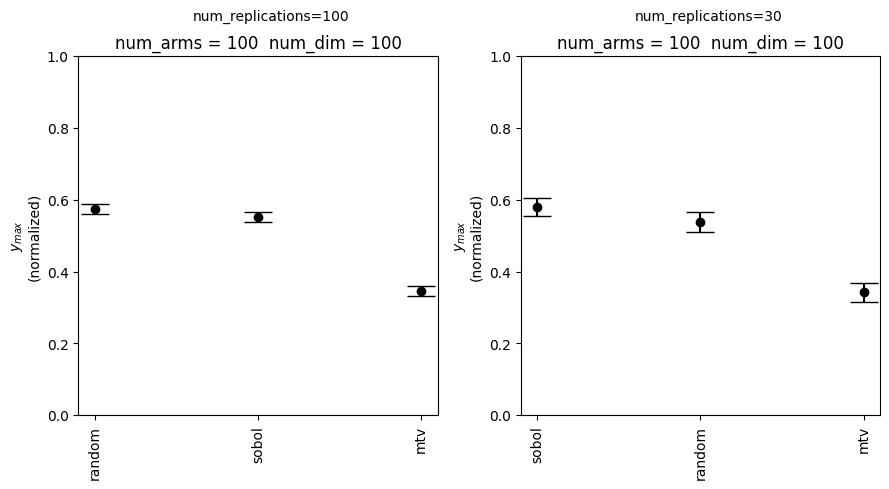

In [8]:
fig, axs = ap.subplots(1,2, figsize=9)
plot_compare_init(axs[0], "exp_2_figure/plot_100d_100arm", num_arms=100, num_dim=100)
axs[0].text(0.6,1.1,"num_replications=100")
plot_compare_init(axs[1], "exp_2_plots/plot_100d_100arm", num_arms=100, num_dim=100)
axs[1].text(0.6,1.1,"num_replications=30")

ap.tight(axs)
plt.show()

No bad data
x [0 1 2] y [0.908338920194312 0.20597032360284126 0.1978702034975471] err [0.008705555998217502 0.010091331956941783 0.010036050042372362]
No bad data
x [0 1 2] y [0.8975511269438347 0.21144706959038362 0.19812319938182732] err [0.017452355930679706 0.018343612519840555 0.018574756585156667]


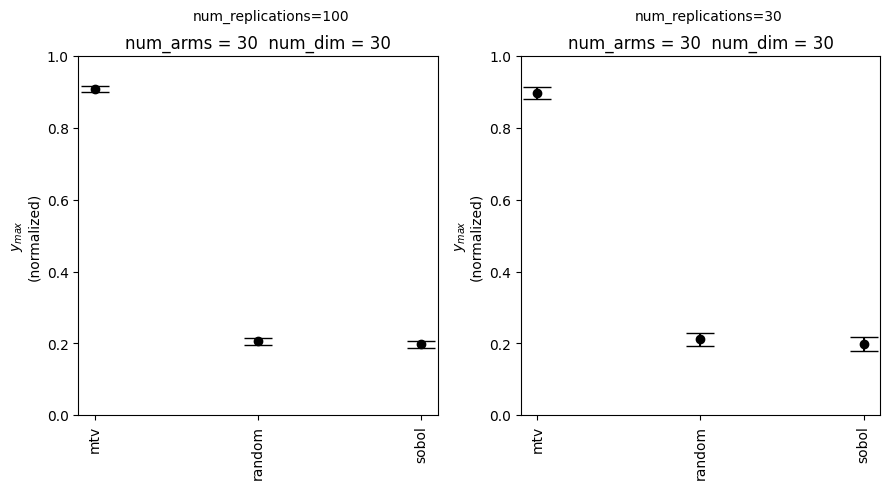

In [9]:
fig, axs = ap.subplots(1,2, figsize=9)
plot_compare_init(axs[0], "exp_2_figure/plot_30d_30arm", num_arms=30, num_dim=30)
axs[0].text(0.6,1.1,"num_replications=100")
plot_compare_init(axs[1], "exp_2_plots/plot_30d_30arm", num_arms=30, num_dim=30)
axs[1].text(0.6,1.1,"num_replications=30")
ap.tight(axs)
plt.show()

No bad data
x [0 1 2] y [0.5654002938325889 0.5146834330254804 0.4105145755052667] err [0.01450257211856339 0.0146021309580544 0.014481790998030186]
No bad data
x [0 1 2] y [0.5855523609432366 0.5007116092706557 0.40201392505012157] err [0.027036127363812276 0.026590986170152323 0.025695803304076843]


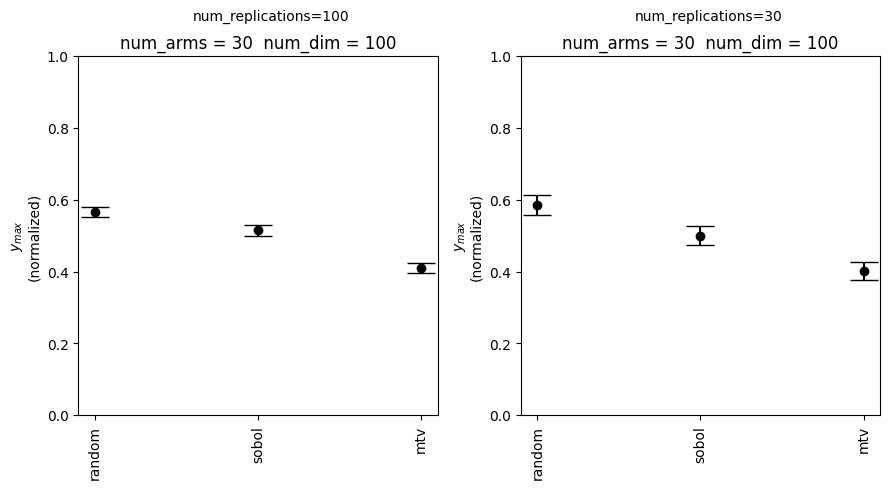

In [10]:
fig, axs = ap.subplots(1,2, figsize=9)
plot_compare_init(axs[0], "exp_2_figure/plot_100d_30arm", num_arms=30, num_dim=100)
axs[0].text(0.6,1.1,"num_replications=100")
plot_compare_init(axs[1], "exp_2_plots/plot_100d_30arm", num_arms=30, num_dim=100)
axs[1].text(0.6,1.1,"num_replications=30")
ap.tight(axs)
plt.show()

No bad data
x [0 1 2] y [0.5664710097310142 0.5255208872882082 0.3968663994848536] err [0.01432176600205532 0.014637307638003031 0.01414770879553147]
No bad data
x [0 1 2] y [0.5424785201083622 0.4860007413707799 0.4651682105069725] err [0.026449996815282838 0.02635376969274877 0.026661951052019902]


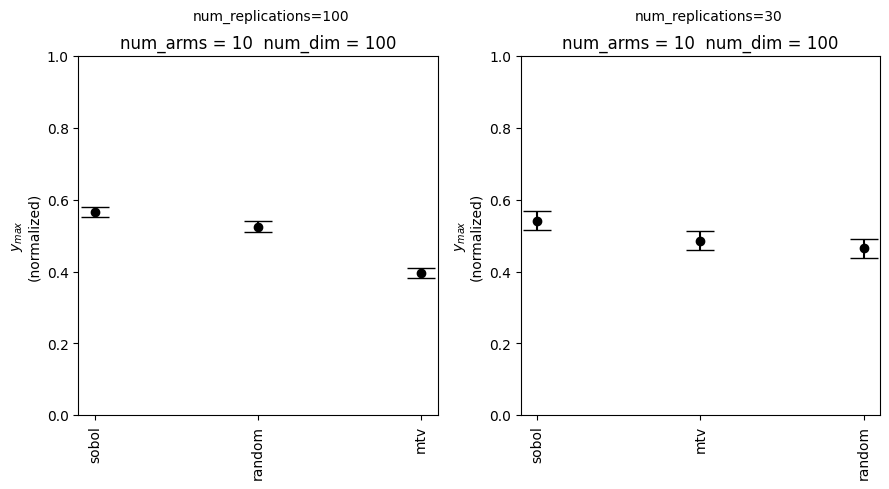

In [11]:
fig, axs = ap.subplots(1,2, figsize=9)
plot_compare_init(axs[0], "exp_2_figure/plot_100d_10arm", num_arms=10, num_dim=100)
axs[0].text(0.6,1.1,"num_replications=100")
plot_compare_init(axs[1], "exp_2_plots/plot_100d_10arm", num_arms=10, num_dim=100)
axs[1].text(0.6,1.1,"num_replications=30")
ap.tight(axs)
plt.show()

No bad data
x [0 1 2] y [0.7599616991441958 0.3218665053422781 0.31770051764920243] err [0.012756494851363407 0.012984462357674077 0.013330847370659137]
No bad data
x [0 1 2] y [0.8028721306743075 0.33308831526074 0.247235999044788] err [0.022137603448871376 0.02373578896781247 0.02191342492500548]


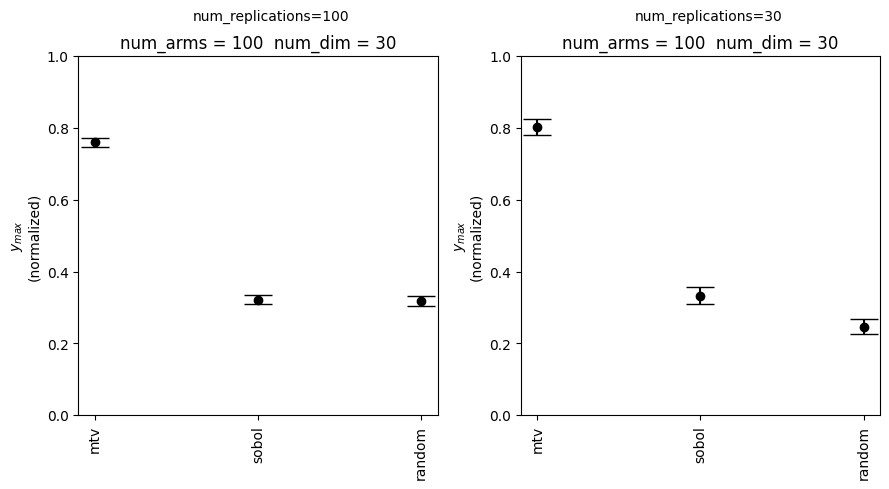

In [12]:
fig, axs = ap.subplots(1,2, figsize=9)
plot_compare_init(axs[0], "exp_2_figure/plot_30d_100arm", num_arms=100, num_dim=30)
axs[0].text(0.6,1.1,"num_replications=100")
plot_compare_init(axs[1], "exp_2_plots/plot_30d_100arm", num_arms=100, num_dim=30)
axs[1].text(0.6,1.1,"num_replications=30")
ap.tight(axs)
plt.show()

No bad data
x [0 1 2] y [0.6590779110333603 0.5617048777801763 0.4320233240267195] err [0.015662625741857093 0.01711268095917564 0.017122504374492576]
No bad data
x [0 1 2] y [0.6398254864451618 0.5866275591228489 0.4381478032353824] err [0.028797073154207452 0.031539356857933576 0.03151237820961829]


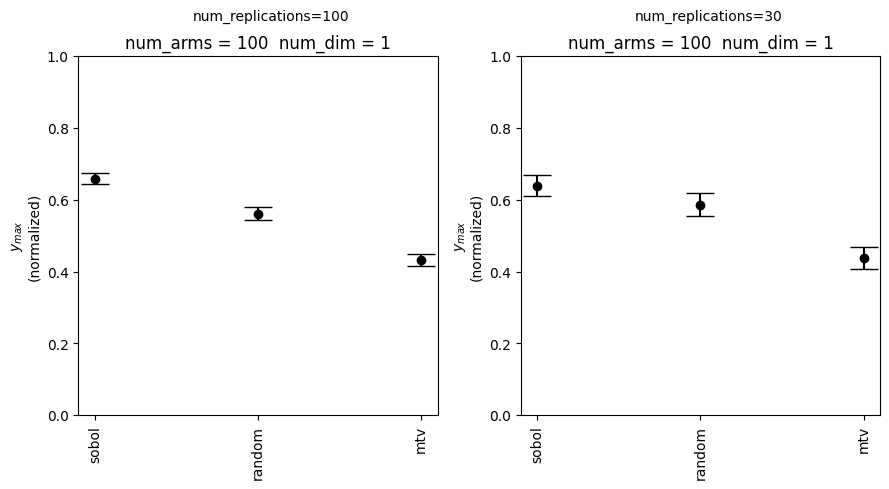

In [13]:
fig, axs = ap.subplots(1,2, figsize=9)
plot_compare_init(axs[0], "exp_2_figure/plot_1d_100arm", num_arms=100, num_dim=1)
axs[0].text(0.6,1.1,"num_replications=100")
plot_compare_init(axs[1], "exp_2_plots/plot_1d_100arm", num_arms=100, num_dim=1)
axs[1].text(0.6,1.1,"num_replications=30")
ap.tight(axs)
plt.show()

BAD: 100dimension_test/plot .ipynb_checkpoints random_100arm
BAD: 100dimension_test/plot .ipynb_checkpoints sobol_100arm
BAD: 100dimension_test/plot .ipynb_checkpoints mtv_100arm
BAD: 100dimension_test/plot .ipynb_checkpoints random_30arm
BAD: 100dimension_test/plot .ipynb_checkpoints sobol_30arm
BAD: 100dimension_test/plot .ipynb_checkpoints mtv_30arm
BAD: 100dimension_test/plot .ipynb_checkpoints random_10arm
BAD: 100dimension_test/plot .ipynb_checkpoints sobol_10arm
BAD: 100dimension_test/plot .ipynb_checkpoints mtv_10arm
BAD: 100dimension_test/plot .ipynb_checkpoints random_3arm
BAD: 100dimension_test/plot .ipynb_checkpoints sobol_3arm
BAD: 100dimension_test/plot .ipynb_checkpoints mtv_3arm
BAD: 100dimension_test/plot .ipynb_checkpoints random_2arm
BAD: 100dimension_test/plot .ipynb_checkpoints sobol_2arm
BAD: 100dimension_test/plot .ipynb_checkpoints mtv_2arm
BAD: 100dimension_test/plot .ipynb_checkpoints random_1arm
BAD: 100dimension_test/plot .ipynb_checkpoints sobol_1arm
BAD: 1

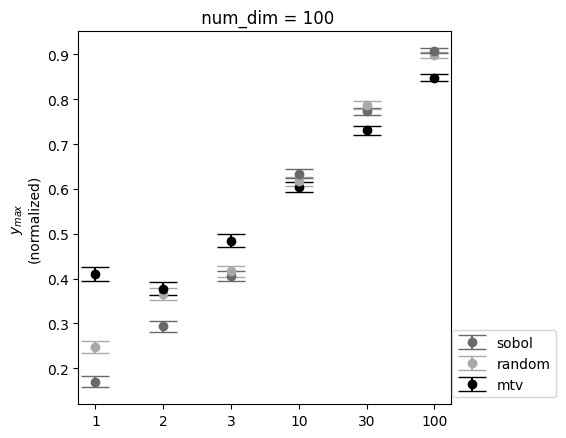

In [15]:
def plot_perf_test(ax, exp_name, optimizers,  num_dim, i_agg=-1):
    # ap.plot_sorted_agg(ax, data_locator, exp_name,  optimizers=optimizers)
    ap.plot_sorted_agg_test(ax, DataLocator(), exp_name, optimizers, i_agg=0)
    ax.set_title(f" num_dim = {num_dim}")
    ax.set_ylabel("$y_{max}$\n(normalized)")
    
def plot_compare_init_test(ax, exp_name, num_dim):
    optimizers = [
        'random_100arm',
        "sobol_100arm",
        'mtv_100arm',
        'random_30arm',
        "sobol_30arm",
        'mtv_30arm',
        'random_10arm',
        "sobol_10arm",
        'mtv_10arm',
        'random_3arm',
        "sobol_3arm",
        'mtv_3arm',
        'random_2arm',
        "sobol_2arm",
        'mtv_2arm',
        'random_1arm',
        "sobol_1arm",
        'mtv_1arm',
    ]
    plot_perf_test(ax, exp_name, optimizers, num_dim, i_agg=0)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    # handles, labels = ax.legend_elements(prop="sizes", alpha=0.6)
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))
    
fig, axs = ap.subplots(1,1, figsize=6)
plot_compare_init_test(axs[0], "100dimension_test/plot", num_dim=100)
legend_without_duplicate_labels(axs[0])

ap.tight(axs)
plt.show()

BAD: mixture_100iter/1d f:michalewicz-1d random_100arm
BAD: mixture_100iter/1d f:michalewicz-1d sobol_100arm
BAD: mixture_100iter/1d f:michalewicz-1d mtv_100arm
BAD: mixture_100iter/1d f:michalewicz-1d random_30arm
BAD: mixture_100iter/1d f:michalewicz-1d sobol_30arm
BAD: mixture_100iter/1d f:michalewicz-1d mtv_30arm
BAD: mixture_100iter/1d f:michalewicz-1d random_10arm
BAD: mixture_100iter/1d f:michalewicz-1d sobol_10arm
BAD: mixture_100iter/1d f:michalewicz-1d mtv_10arm
BAD: mixture_100iter/1d f:michalewicz-1d random_3arm
BAD: mixture_100iter/1d f:michalewicz-1d sobol_3arm
BAD: mixture_100iter/1d f:michalewicz-1d mtv_3arm
BAD: mixture_100iter/1d f:michalewicz-1d random_1arm
BAD: mixture_100iter/1d f:michalewicz-1d sobol_1arm
BAD: mixture_100iter/1d f:michalewicz-1d mtv_1arm
BAD: mixture_100iter/1d f:rosenbrock-1d random_100arm
BAD: mixture_100iter/1d f:rosenbrock-1d sobol_100arm
BAD: mixture_100iter/1d f:rosenbrock-1d mtv_100arm
BAD: mixture_100iter/1d f:rosenbrock-1d random_30arm
BA

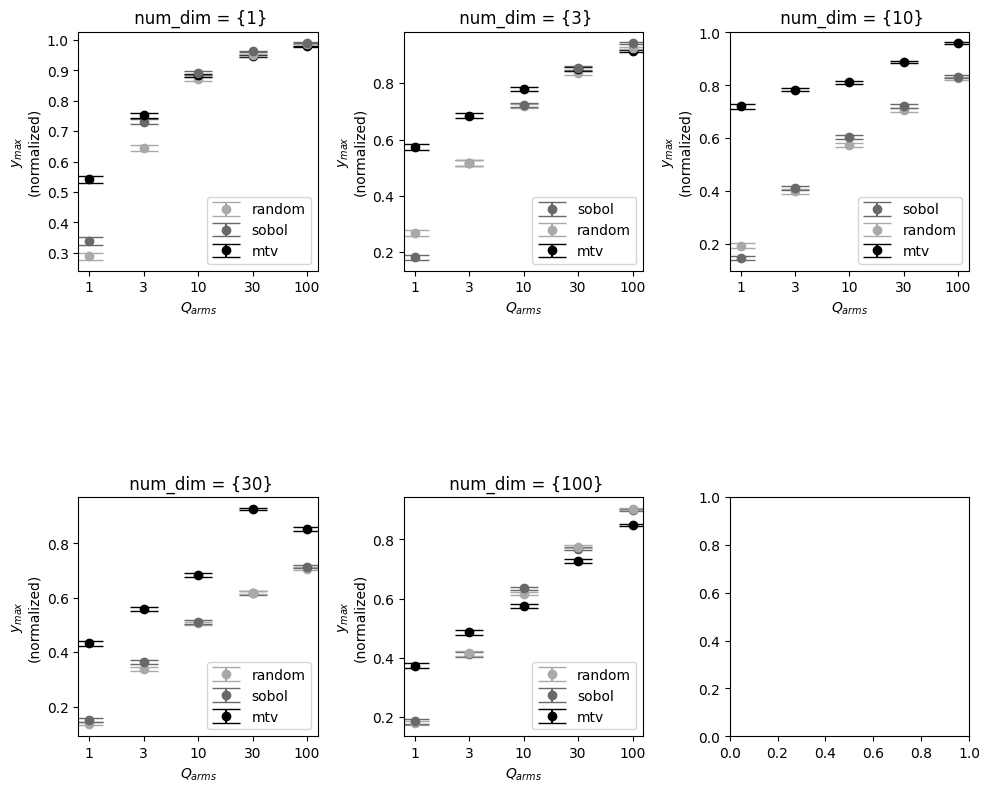

In [22]:
def plot_perf_test(ax, exp_name, optimizers,  num_dim, i_agg=-1):
    # ap.plot_sorted_agg(ax, data_locator, exp_name,  optimizers=optimizers)
    ap.plot_sorted_agg_test(ax, DataLocator(), exp_name, optimizers, i_agg=0)
    ax.set_title(f" num_dim = {num_dim}")
    ax.set_ylabel("$y_{max}$\n(normalized)")
    ax.set_xlabel("$Q_{arms}$")
    
def plot_compare_init_test(ax, exp_name, num_dim):
    optimizers = [
        'random_100arm',
        "sobol_100arm",
        'mtv_100arm',
        'random_30arm',
        "sobol_30arm",
        'mtv_30arm',
        'random_10arm',
        "sobol_10arm",
        'mtv_10arm',
        'random_3arm',
        "sobol_3arm",
        'mtv_3arm',
        'random_1arm',
        "sobol_1arm",
        'mtv_1arm',
    ]
    plot_perf_test(ax, exp_name, optimizers, num_dim, i_agg=0)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    # handles, labels = ax.legend_elements(prop="sizes", alpha=0.6)
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1, 0))
    
fig, axs = ap.subplots(2,3, figsize=10)
dimensions = [1,3,10,30,100]
for i in range(5):
    plot_compare_init_test(axs[i], f"mixture_100iter/{dimensions[i]}d", num_dim={dimensions[i]})
    legend_without_duplicate_labels(axs[i])
ap.tight(axs)
plt.savefig("figures/plot_mixture.png")
plt.show()

BAD: mixture/1d f:ackley-1d mtv_1arm
BAD: mixture/1d f:michalewicz-1d random_100arm
BAD: mixture/1d f:michalewicz-1d sobol_100arm
BAD: mixture/1d f:michalewicz-1d mtv_100arm
BAD: mixture/1d f:michalewicz-1d random_30arm
BAD: mixture/1d f:michalewicz-1d sobol_30arm
BAD: mixture/1d f:michalewicz-1d mtv_30arm
BAD: mixture/1d f:michalewicz-1d random_10arm
BAD: mixture/1d f:michalewicz-1d sobol_10arm
BAD: mixture/1d f:michalewicz-1d mtv_10arm
BAD: mixture/1d f:michalewicz-1d random_3arm
BAD: mixture/1d f:michalewicz-1d sobol_3arm
BAD: mixture/1d f:michalewicz-1d mtv_3arm
BAD: mixture/1d f:michalewicz-1d random_2arm
BAD: mixture/1d f:michalewicz-1d sobol_2arm
BAD: mixture/1d f:michalewicz-1d mtv_2arm
BAD: mixture/1d f:michalewicz-1d random_1arm
BAD: mixture/1d f:michalewicz-1d sobol_1arm
BAD: mixture/1d f:michalewicz-1d mtv_1arm
BAD: mixture/1d f:rosenbrock-1d random_100arm
BAD: mixture/1d f:rosenbrock-1d sobol_100arm
BAD: mixture/1d f:rosenbrock-1d mtv_100arm
BAD: mixture/1d f:rosenbrock-1d

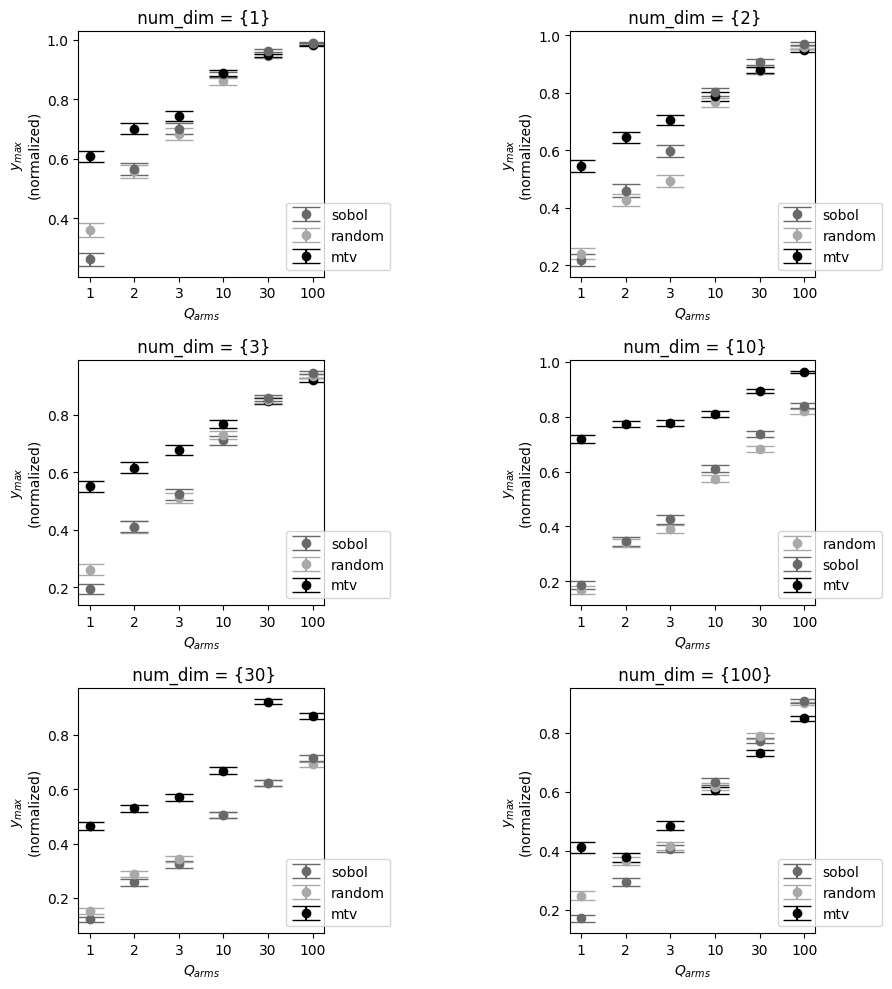

In [16]:
def plot_perf_test(ax, exp_name, optimizers,  num_dim, i_agg=-1):
    # ap.plot_sorted_agg(ax, data_locator, exp_name,  optimizers=optimizers)
    ap.plot_sorted_agg_test(ax, DataLocator(), exp_name, optimizers, i_agg=0)
    ax.set_title(f" num_dim = {num_dim}")
    ax.set_ylabel("$y_{max}$\n(normalized)")
    ax.set_xlabel("$Q_{arms}$")
    
def plot_compare_init_test(ax, exp_name, num_dim):
    optimizers = [
        'random_100arm',
        "sobol_100arm",
        'mtv_100arm',
        'random_30arm',
        "sobol_30arm",
        'mtv_30arm',
        'random_10arm',
        "sobol_10arm",
        'mtv_10arm',
        'random_3arm',
        "sobol_3arm",
        'mtv_3arm',
        'random_2arm',
        "sobol_2arm",
        'mtv_2arm',
        'random_1arm',
        "sobol_1arm",
        'mtv_1arm',
    ]
    plot_perf_test(ax, exp_name, optimizers, num_dim, i_agg=0)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    # handles, labels = ax.legend_elements(prop="sizes", alpha=0.6)
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))
    
fig, axs = ap.subplots(3,2, figsize=10)
dimensions = [1,2,3,10,30,100]
for i in range(6):
    plot_compare_init_test(axs[i], f"mixture/{dimensions[i]}d", num_dim={dimensions[i]})
    legend_without_duplicate_labels(axs[i])

ap.tight(axs)
plt.show()

BAD: mixture_100tr/1d f:michalewicz-1d random_100arm
BAD: mixture_100tr/1d f:michalewicz-1d sobol_100arm
BAD: mixture_100tr/1d f:michalewicz-1d mtv_100arm
BAD: mixture_100tr/1d f:michalewicz-1d random_30arm
BAD: mixture_100tr/1d f:michalewicz-1d sobol_30arm
BAD: mixture_100tr/1d f:michalewicz-1d mtv_30arm
BAD: mixture_100tr/1d f:michalewicz-1d random_10arm
BAD: mixture_100tr/1d f:michalewicz-1d sobol_10arm
BAD: mixture_100tr/1d f:michalewicz-1d mtv_10arm
BAD: mixture_100tr/1d f:michalewicz-1d random_3arm
BAD: mixture_100tr/1d f:michalewicz-1d sobol_3arm
BAD: mixture_100tr/1d f:michalewicz-1d mtv_3arm
BAD: mixture_100tr/1d f:rosenbrock-1d random_100arm
BAD: mixture_100tr/1d f:rosenbrock-1d sobol_100arm
BAD: mixture_100tr/1d f:rosenbrock-1d mtv_100arm
BAD: mixture_100tr/1d f:rosenbrock-1d random_30arm
BAD: mixture_100tr/1d f:rosenbrock-1d sobol_30arm
BAD: mixture_100tr/1d f:rosenbrock-1d mtv_30arm
BAD: mixture_100tr/1d f:rosenbrock-1d random_10arm
BAD: mixture_100tr/1d f:rosenbrock-1d so

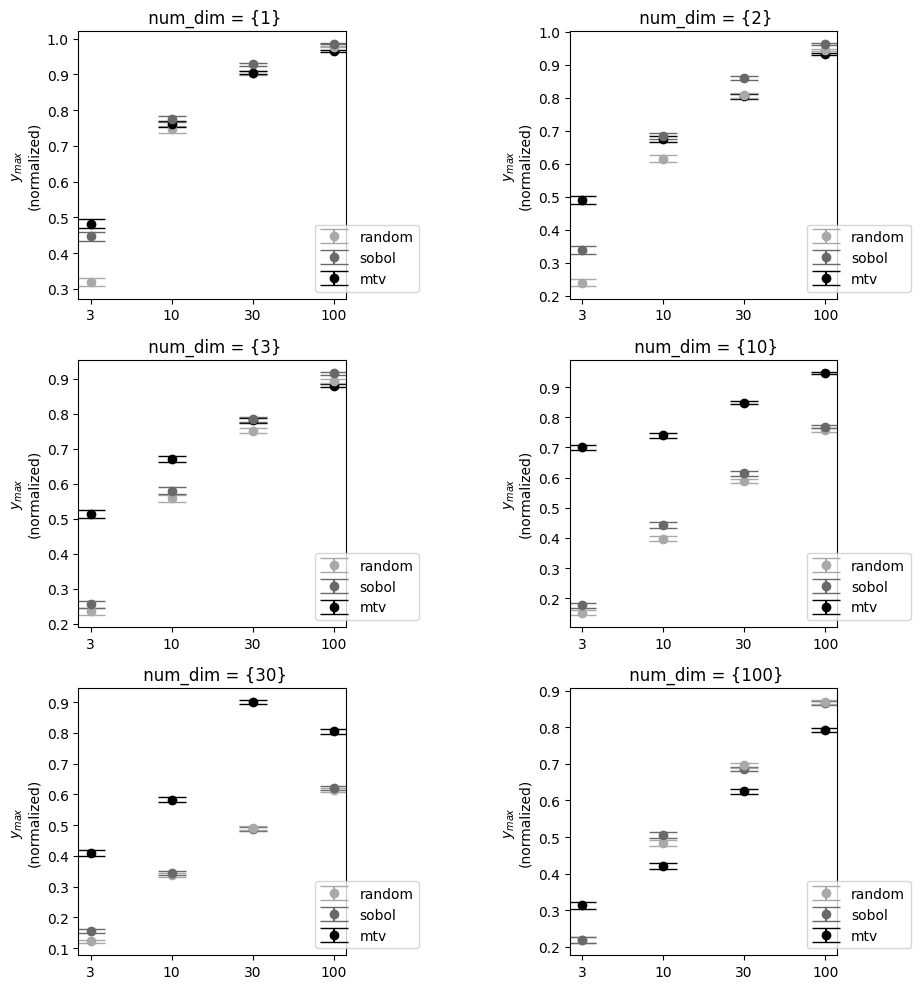

In [17]:
def plot_perf_test(ax, exp_name, optimizers,  num_dim, i_agg=-1):
    # ap.plot_sorted_agg(ax, data_locator, exp_name,  optimizers=optimizers)
    ap.plot_sorted_agg_test(ax, DataLocator(), exp_name, optimizers, i_agg=0)
    ax.set_title(f" num_dim = {num_dim}")
    ax.set_ylabel("$y_{max}$\n(normalized)")
    
def plot_compare_init_test(ax, exp_name, num_dim):
    optimizers = [
        'random_100arm',
        "sobol_100arm",
        'mtv_100arm',
        'random_30arm',
        "sobol_30arm",
        'mtv_30arm',
        'random_10arm',
        "sobol_10arm",
        'mtv_10arm',
        'random_3arm',
        "sobol_3arm",
        'mtv_3arm',
        # 'random_2arm',
        # "sobol_2arm",
        # 'mtv_2arm',
        # 'random_1arm',
        # "sobol_1arm",
        # 'mtv_1arm',
    ]
    plot_perf_test(ax, exp_name, optimizers, num_dim, i_agg=0)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    # handles, labels = ax.legend_elements(prop="sizes", alpha=0.6)
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))
    
fig, axs = ap.subplots(3,2, figsize=10)
dimensions = [1,2,3,10,30,100]
for i in range(6):
    plot_compare_init_test(axs[i], f"mixture_100tr/{dimensions[i]}d", num_dim={dimensions[i]})
    legend_without_duplicate_labels(axs[i])

ap.tight(axs)
plt.show()

BAD: exp_2_plots/plot_1d_1arm f:ackley-1d mtv

1 / 21 files bad. 4.8% missing data
x [0 1 2] y [0.7436247046443949 0.520385510422451 0.35910428018274015] err [0.023294112496461458 0.031825174423374764 0.030655331332081207]
optimizers ['mtv', 'random', 'sobol']


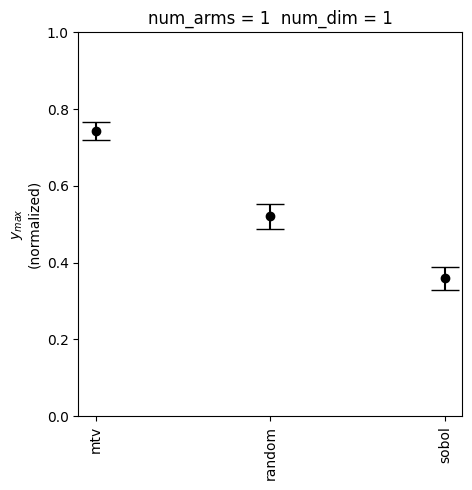

In [14]:
fig, axs = ap.subplots(1,1, figsize=5)
plot_compare_init(axs[0], "exp_2_plots/plot_1d_1arm", num_arms=1, num_dim=1)

ap.tight(axs)
plt.show()

BAD: exp_2_plots/plot_1d_1arm f:ackley-1d mtv

1 / 21 files bad. 4.8% missing data
x [0 1 2] y [0.7436247046443949 0.520385510422451 0.35910428018274015] err [0.023294112496461458 0.031825174423374764 0.030655331332081207]
No bad data
x [0 1 2] y [0.7527468765696165 0.43644245408637516 0.32130687820910125] err [0.02277452790344616 0.02688931627508121 0.024652721855537657]
No bad data
x [0 1 2] y [0.7813090481404014 0.40274072631531804 0.33652433526542536] err [0.020790110443072787 0.025587950747605063 0.02524794235377991]
No bad data
x [0 1 2] y [0.9160573619412692 0.3200306402317056 0.2243543502539355] err [0.013211098687345081 0.02316588037791915 0.0206215392320114]
No bad data
x [0 1 2] y [0.8975511269438347 0.21144706959038362 0.19812319938182732] err [0.017452355930679706 0.018343612519840555 0.018574756585156667]
No bad data
x [0 1 2] y [0.5800458650044321 0.5380520122532605 0.34281109570063695] err [0.02537882536579877 0.026963654090819224 0.0260263363357928]


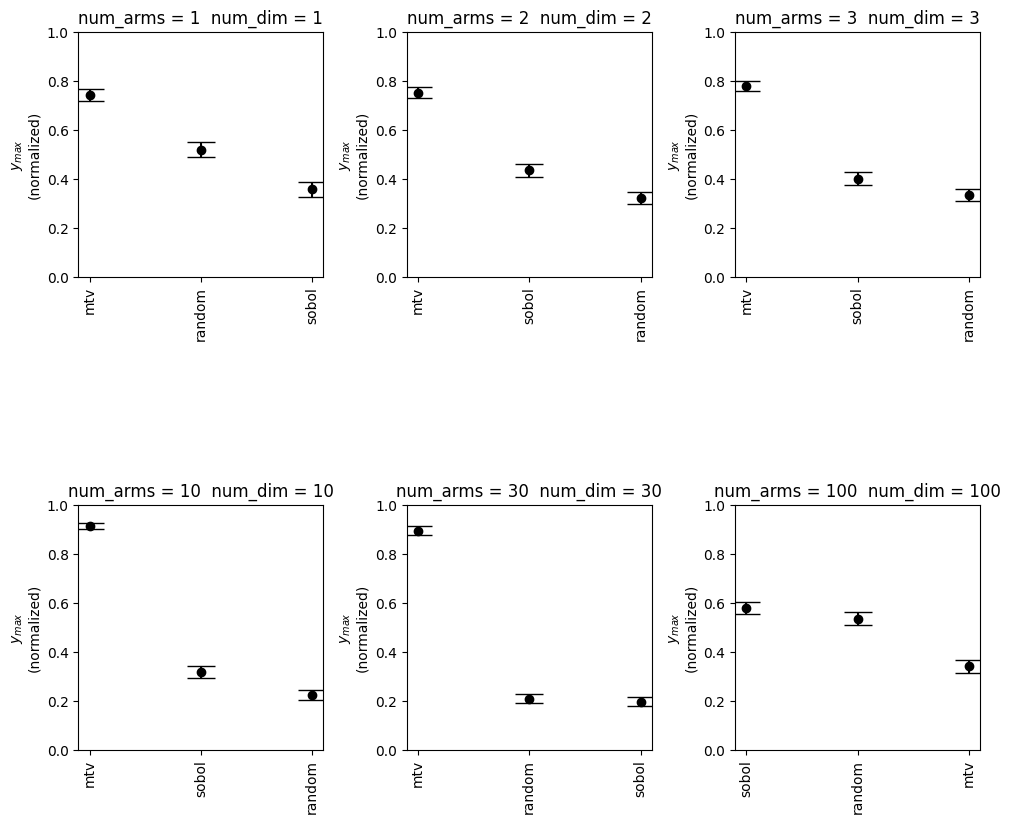

In [35]:
fig, axs = ap.subplots(2, 3, figsize=10)
plot_compare_init(axs[0], "exp_2_plots/plot_1d_1arm", num_arms=1, num_dim=1)
plot_compare_init(axs[1], "exp_2_plots/plot_2d_2arm", num_arms=2, num_dim=2)
plot_compare_init(axs[2], "exp_2_plots/plot_3d_3arm", num_arms=3, num_dim=3)
plot_compare_init(axs[3], "exp_2_plots/plot_10d_10arm", num_arms=10, num_dim=10)
plot_compare_init(axs[4], "exp_2_plots/plot_30d_30arm", num_arms=30, num_dim=30)
plot_compare_init(axs[5], "exp_2_plots/plot_100d_100arm", num_arms=100, num_dim=100)

ap.tight(axs)
plt.savefig("figures/compare_init.png")
plt.show()

No bad data
x [0 1 2] y [0.7635526049677311 0.39428622447147454 0.3758612635922792] err [0.011990703990537624 0.014145142798285309 0.014248984864004438]
No bad data
x [0 1 2] y [0.9067768351047825 0.33110561522810394 0.22881672569007025] err [0.007887750903033865 0.012601224042287735 0.011277699166919083]
No bad data
x [0 1 2] y [0.908338920194312 0.20597032360284126 0.1978702034975471] err [0.008705555998217502 0.010091331956941783 0.010036050042372362]
No bad data
x [0 1 2] y [0.5737463343768218 0.5516434161939379 0.34591490162473026] err [0.01440489375453569 0.014392013108726679 0.013982409848348835]


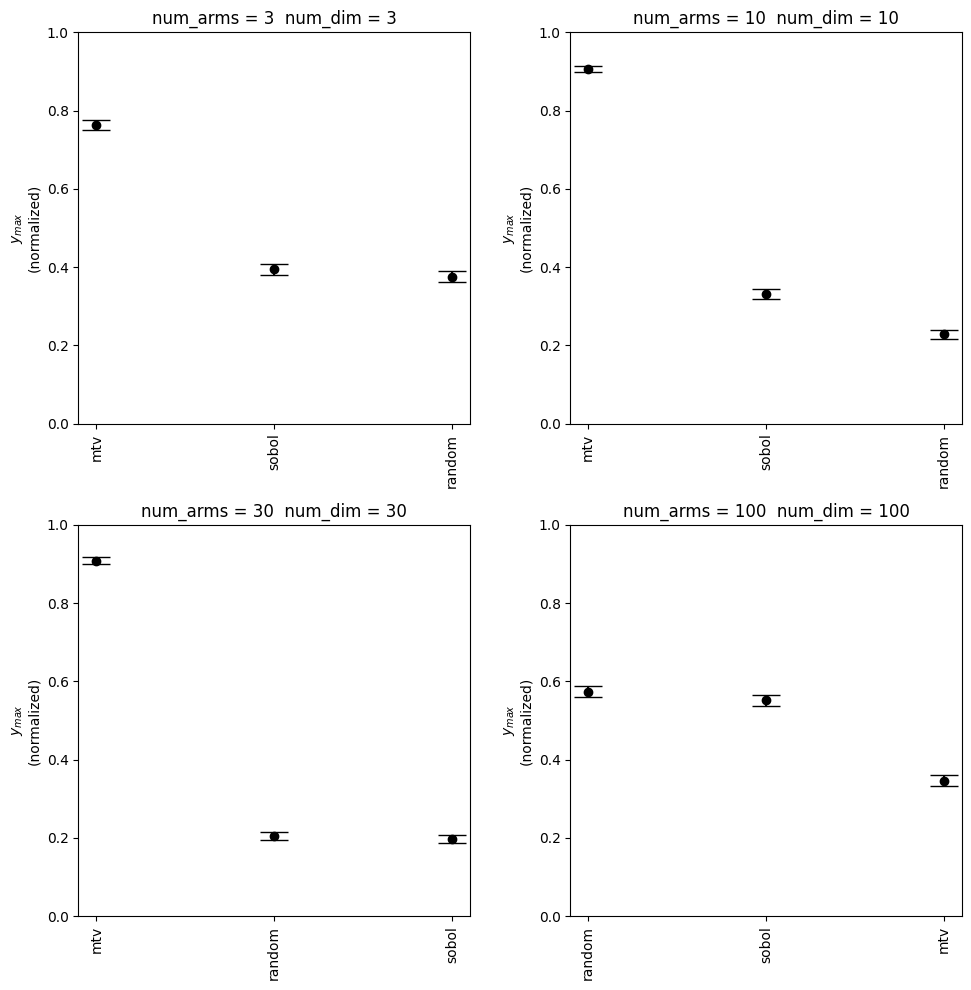

In [39]:
fig, axs = ap.subplots(2, 2, figsize=10)
# plot_compare_init(axs[0], "exp_2_figure/plot_1d_1arm", num_arms=1, num_dim=1)
# plot_compare_init(axs[1], "exp_2_figure/plot_2d_2arm", num_arms=2, num_dim=2)
plot_compare_init(axs[0], "exp_2_figure/plot_3d_3arm", num_arms=3, num_dim=3)
plot_compare_init(axs[1], "exp_2_figure/plot_10d_10arm", num_arms=10, num_dim=10)
plot_compare_init(axs[2], "exp_2_figure/plot_30d_30arm", num_arms=30, num_dim=30)
plot_compare_init(axs[3], "exp_2_figure/plot_100d_100arm", num_arms=100, num_dim=100)

ap.tight(axs)
plt.savefig("figures/compare_init.png")
plt.show()

## Plot x-with different arms under same dimension

In [18]:
def plot_perf_dim(ax, exp_name, optimizers, num_arms, num_dim,indicator, i_agg=-1):
    ap.plot_sorted_agg_dim(ax, DataLocator(), exp_name,  num_arms, num_dim, indicator, optimizers, i_agg=0)
    # ap.plot_sorted_agg(ax, data_locator, exp_name,  optimizers=optimizers)
    if indicator =="Dim": 
        # ap.plot_sorted_agg_dim(ax, DataLocator(), exp_name,  num_arms, num_dim, indicator, optimizers, i_agg=0)
        ax.set_title(f"num_dim = {num_dim}")
        ax.set_ylabel("$y_{max}$\n(normalized)")
        ax.set_xlabel("$Q_{arms}$")
    if indicator =="Arm":
        # ap.plot_sorted_agg_dim(ax, DataLocator(), exp_name,  num_arms, num_dim, indicator, optimizers, i_agg=0)
        ax.set_title(f"num_arms = {num_arms}")
        ax.set_ylabel("$y_{max}$\n(normalized)")
        ax.set_xlabel("$Dimensions}$")
    

In [19]:
def plot_compare_init_dim(ax, exp_name, num_arms, num_dim, indicator):
    optimizers = [
        'random',
        "sobol",
        'mtv',
    ]
    plot_perf_dim(ax, exp_name, optimizers, num_arms, num_dim,indicator, i_agg=0)

In [20]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))

No bad data


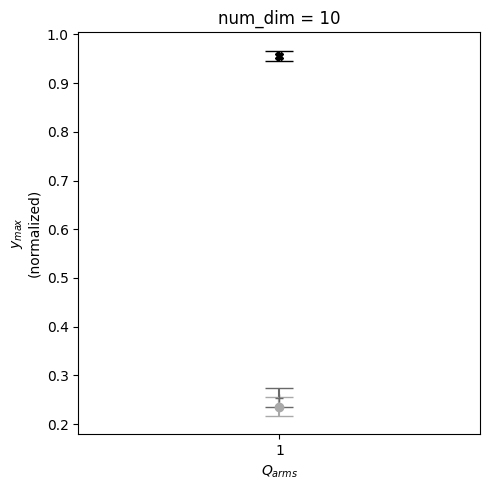

In [21]:
fig, axs = ap.subplots(1,1, figsize=5)
# indicator = "Arm"
plot_compare_init_dim(axs[0], "exp_2_plots/plot_10d_1arm", num_arms=1, num_dim=10, indicator="Dim")

ap.tight(axs)
plt.show()

No bad data


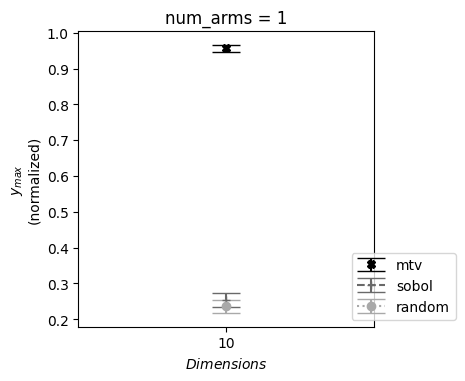

In [22]:
fig, axs = ap.subplots(1,1, figsize=5)
# indicator = "Arm"
plot_compare_init_dim(axs[0], "exp_2_plots/plot_10d_1arm", num_arms=1, num_dim=10, indicator="Arm")
legend_without_duplicate_labels(axs[0])
ap.tight(axs)
plt.show()

BAD: exp_2_plots/plot_1d_1arm f:ackley-1d mtv

1 / 21 files bad. 4.8% missing data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data


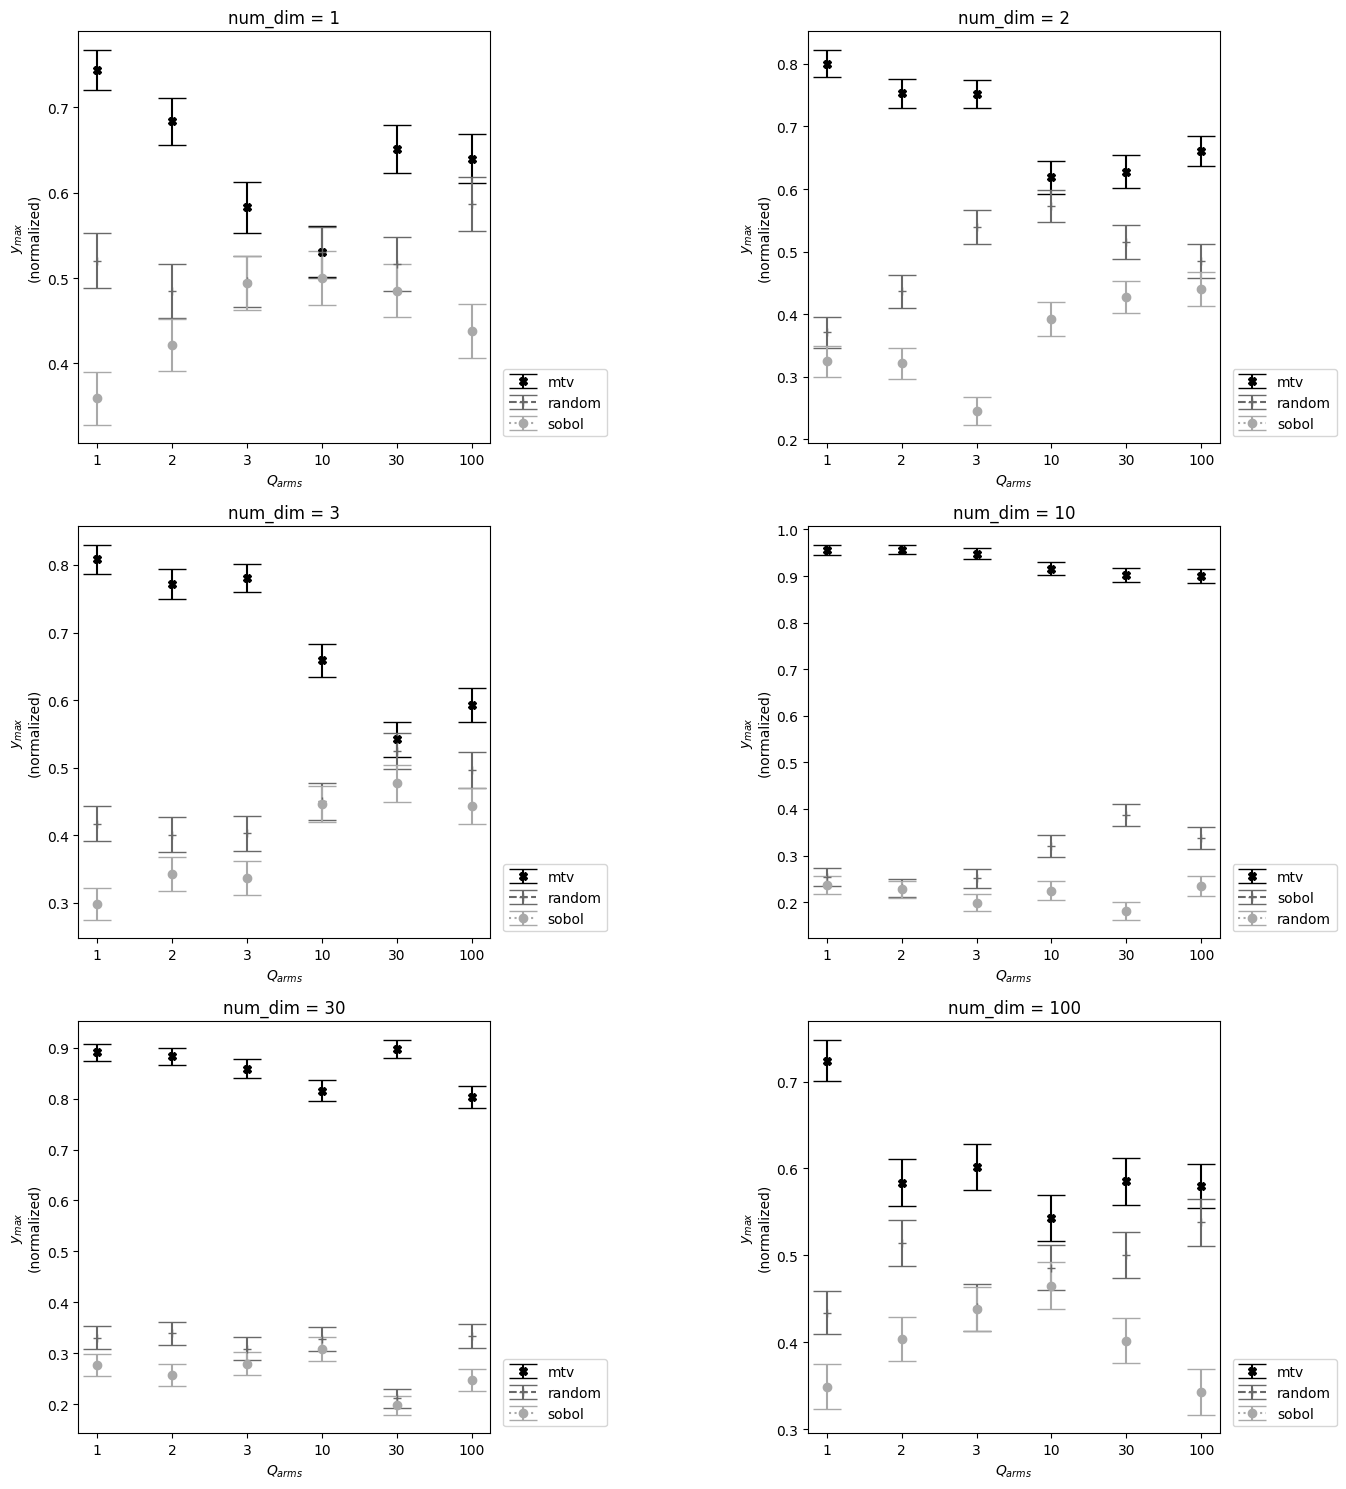

In [23]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))

num_dims = [1,2,3,10,30,100]
fig, axs = ap.subplots(3,2, figsize=15)
for i in range(len(num_dims)):
    num_dim = num_dims[i]
    for num_arms in [1,2,3,10,30,100]:
        plot_compare_init_dim(axs[i], f"exp_2_plots/plot_{num_dim}d_{num_arms}arm", num_arms, num_dim,indicator="Dim")
        legend_without_duplicate_labels(axs[i])
ap.tight(axs)
# plt.savefig("figures/compare_init_dim.png")
plt.show()

BAD: exp_2_plots/plot_1d_1arm f:ackley-1d mtv

1 / 21 files bad. 4.8% missing data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data
No bad data


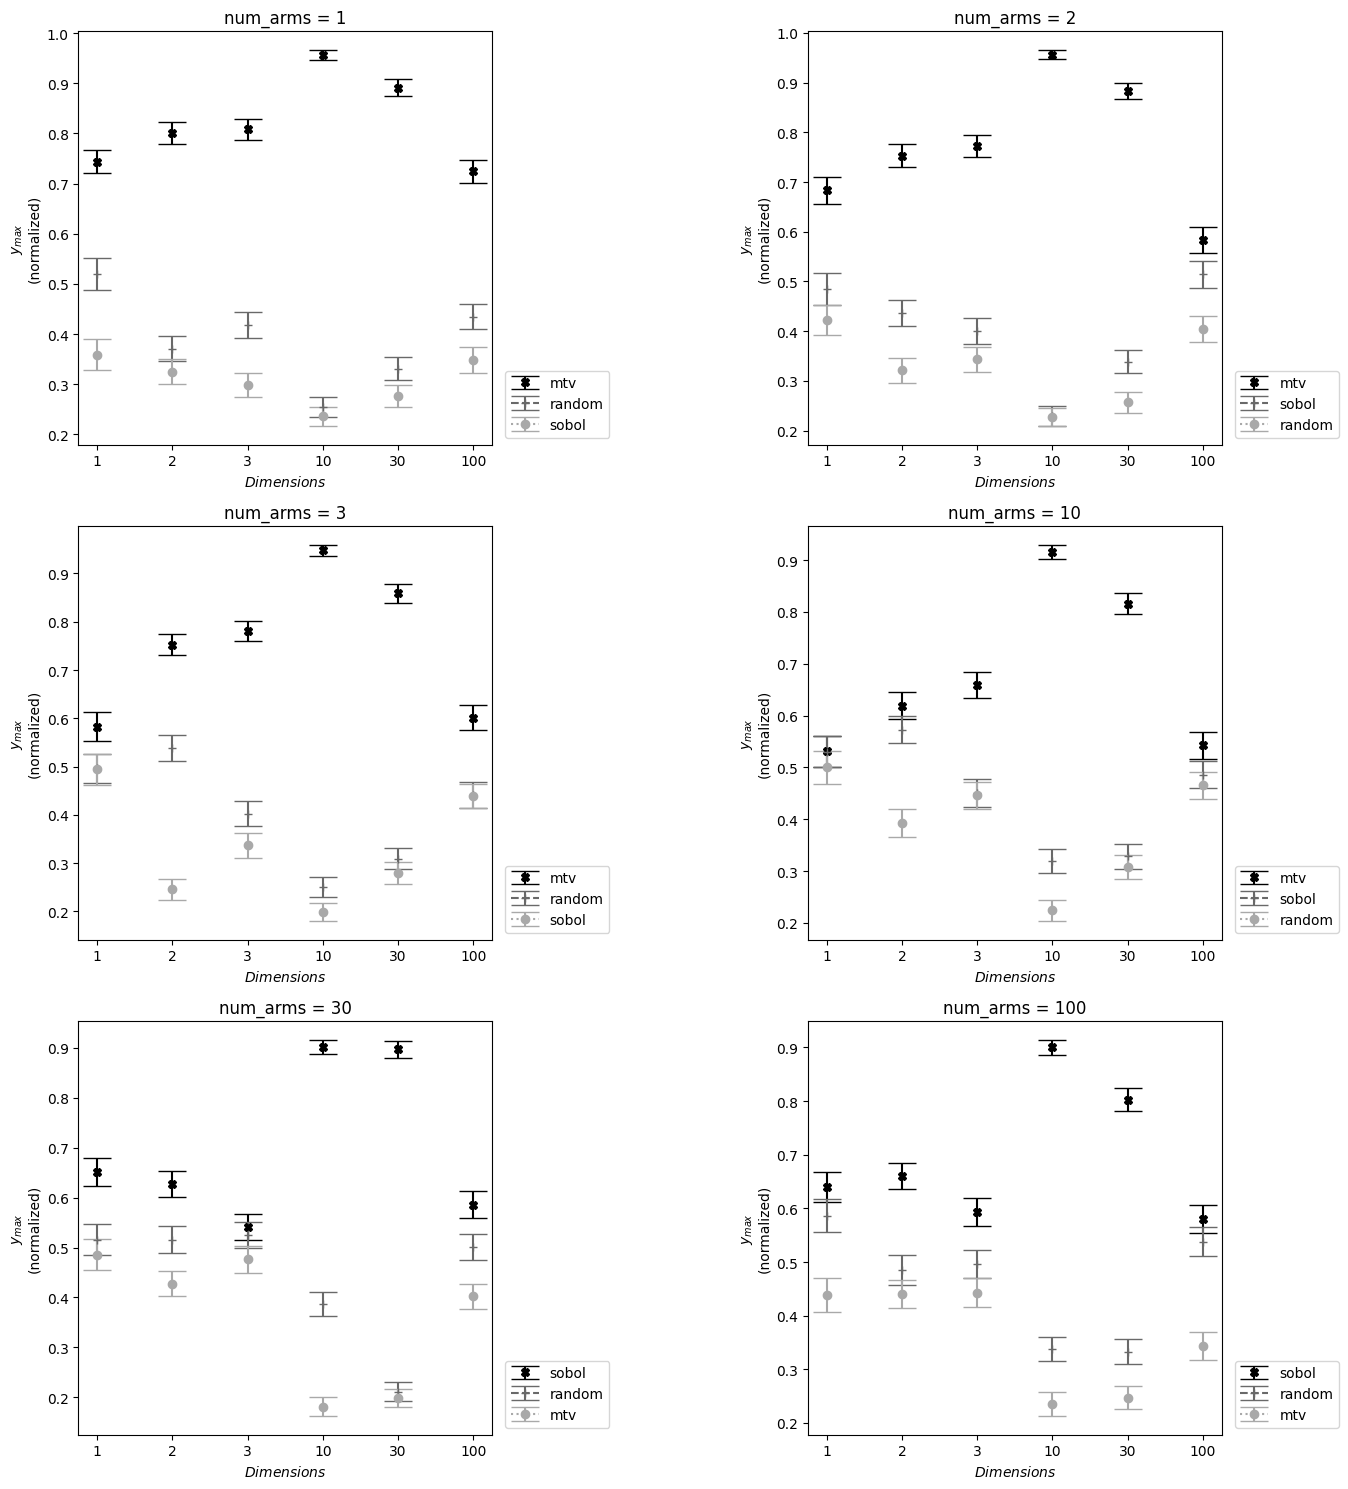

In [24]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))
NUM_ARMS = [1,2,3,10,30,100]
fig, axs = ap.subplots(3,2, figsize=15)
for i in range(len(num_dims)):
    num_arms = NUM_ARMS[i]
    for num_dim in [1,2,3,10,30,100]:
        plot_compare_init_dim(axs[i], f"exp_2_plots/plot_{num_dim}d_{num_arms}arm", num_arms, num_dim,indicator="Arm")
        legend_without_duplicate_labels(axs[i])
ap.tight(axs)
# plt.savefig("figures/compare_init_dim.png")
plt.show()


AttributeError: module 'analysis.plotting' has no attribute 'plot_agg_dim_all'

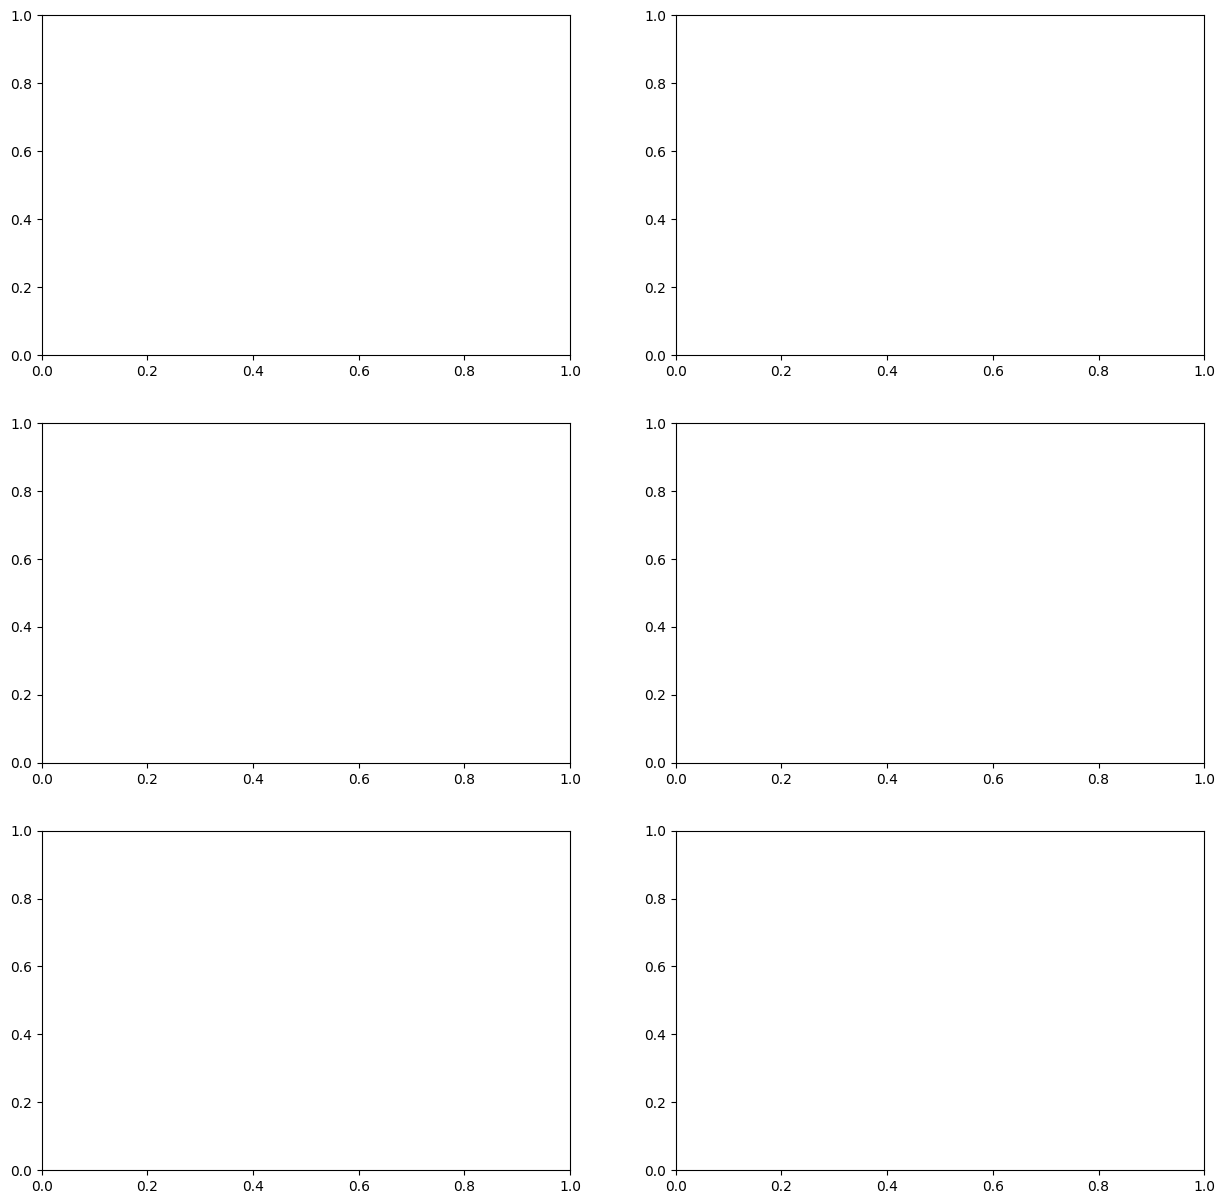

In [25]:
def plot_perf_dim(ax, exp_name, optimizers, num_arms, num_dim, i_agg=-1):
    ap.plot_agg_dim_all(ax, data_locator, exp_name, num_arms, optimizers=optimizers, sort=True, i_agg=i_agg)
    ax.set_title(f"num_dim = {num_dim}")
    ax.set_ylabel("$y_{max}$\n(normalized)")
    ax.set_xlabel("$Q_{arms}$")
    
def plot_compare_init_dim(ax, exp_name, num_arms, num_dim):
    optimizers = [
        'random',
        "sobol",
        'mtv',
    ]
    plot_perf_dim(ax, exp_name, optimizers, num_arms, num_dim, i_agg=0)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))

num_dims = [1,2,3,10,30,100]
fig, axs = ap.subplots(3,2, figsize=15)
for i in range(len(num_dims)):
    num_dim = num_dims[i]
    for num_arms in [1,2,3,10,30,100]:
        plot_compare_init_dim(axs[i], f"exp_2_plots/plot_{num_dim}d_{num_arms}arm", num_arms, num_dim)
        legend_without_duplicate_labels(axs[i])
ap.tight(axs)
plt.savefig("figures/compare_init_dim.png")
plt.show()

## Plot x-with different dimensions under same Q-arm

AttributeError: module 'analysis.plotting' has no attribute 'plot_sorted_agg_arm'

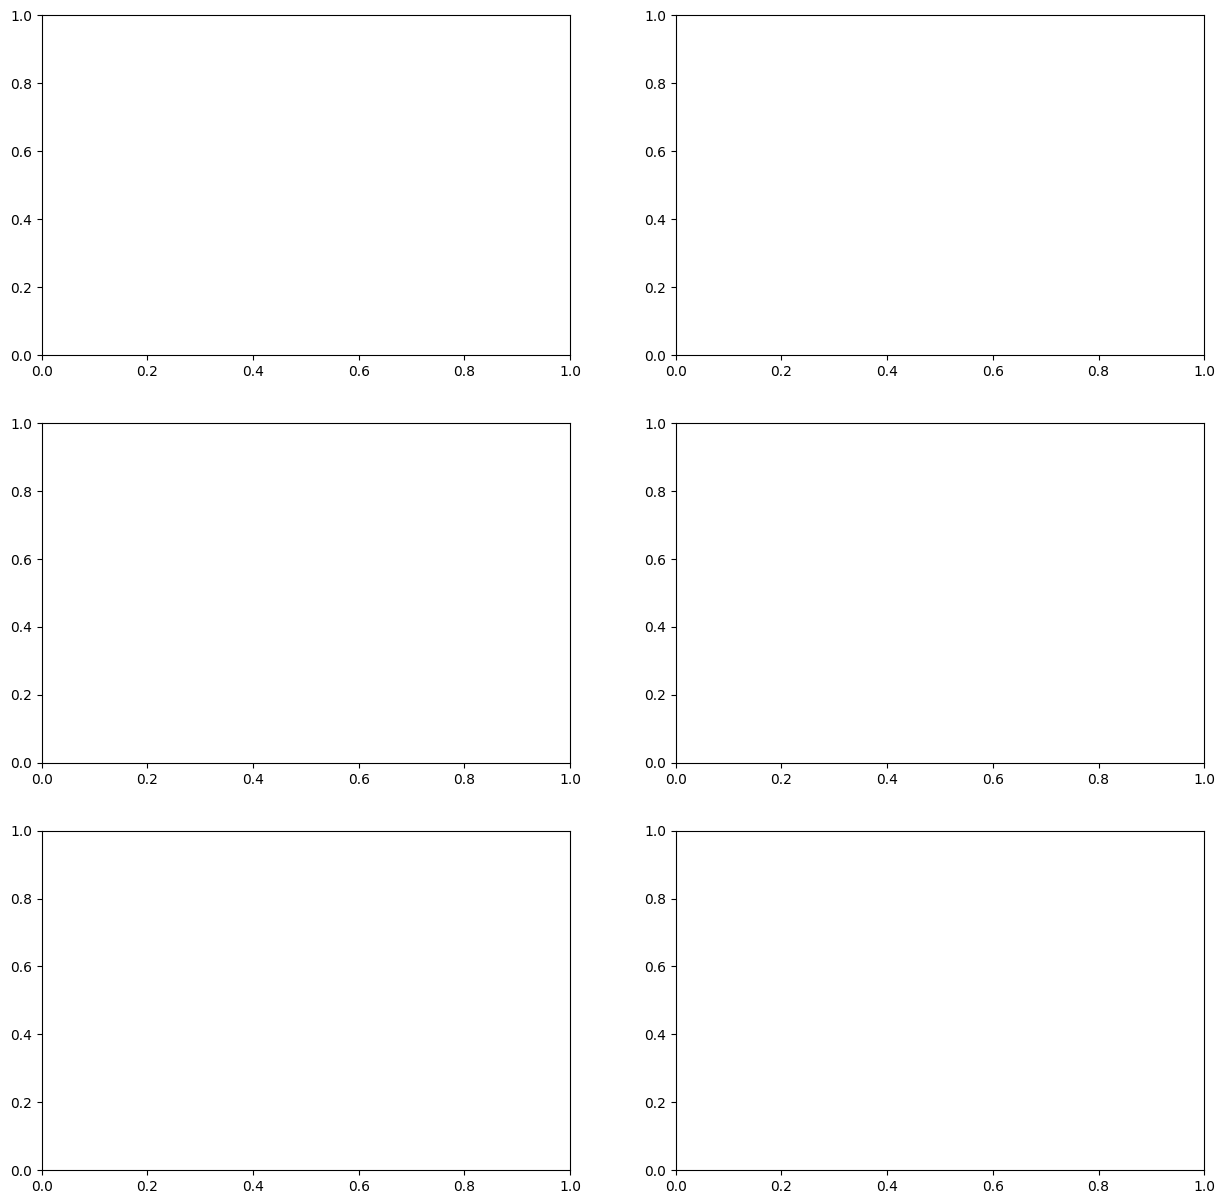

In [20]:
def plot_perf_arm(ax, exp_name, optimizers, num_arms, num_dim, i_agg=-1):
    ap.plot_sorted_agg_arm(ax, DataLocator(), exp_name,  num_dim, optimizers, i_agg=0)
    ax.set_title(f"num_arms = {num_arms}")
    ax.set_ylabel("$y_{max}$\n(normalized)")
    ax.set_xlabel("$Dimensions}$")
    
def plot_compare_init_arm(ax, exp_name, num_arms, num_dim):
    optimizers = [
        'random',
        "sobol",
        'mtv',
    ]
    plot_perf_arm(ax, exp_name, optimizers, num_arms, num_dim, i_agg=0)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))

NUM_ARMS = [1,2,3,10,30,100]
fig, axs = ap.subplots(3,2, figsize=15)
for i in range(len(num_dims)):
    num_arms = NUM_ARMS[i]
    for num_dim in [1,2,3,10,30,100]:
        plot_compare_init_arm(axs[i], f"exp_2_plots/plot_{num_dim}d_{num_arms}arm", num_arms, num_dim)
        legend_without_duplicate_labels(axs[i])
ap.tight(axs)
plt.savefig("figures/compare_init_arm.png")
plt.show()

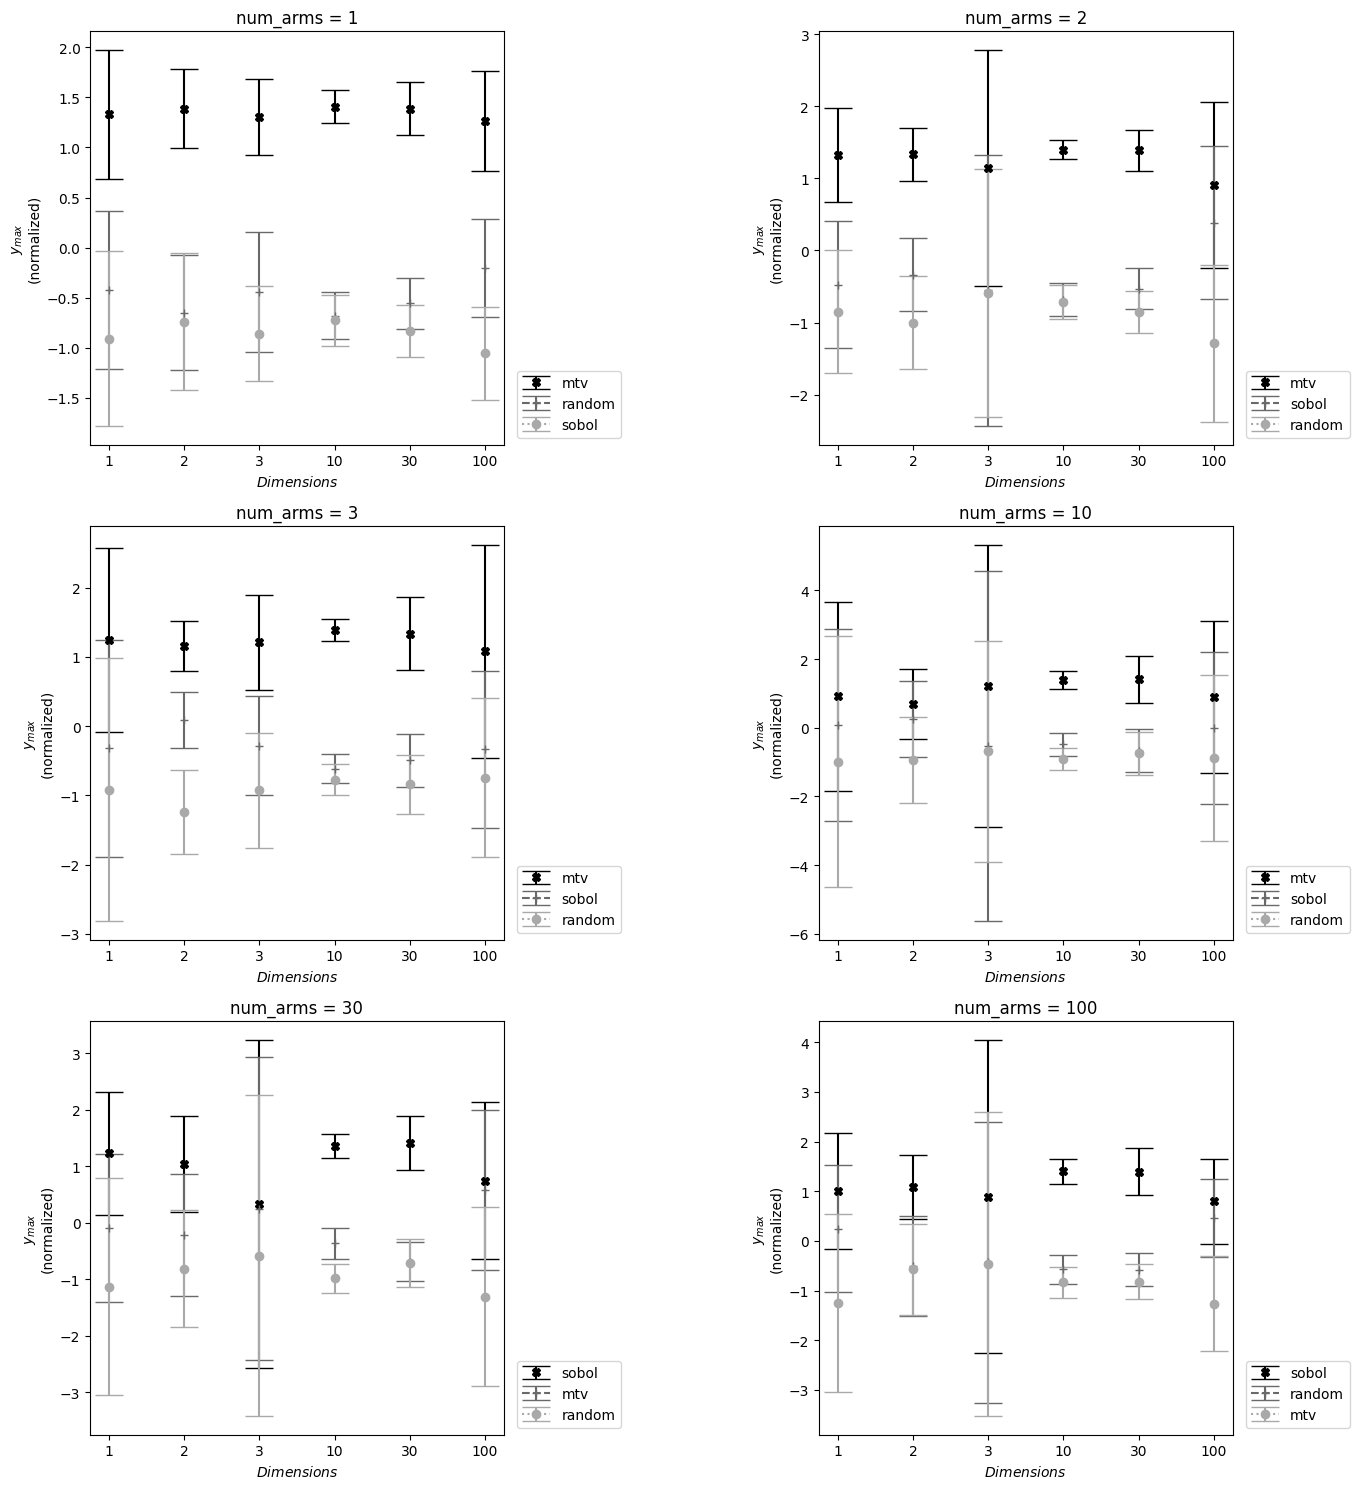

In [9]:
def plot_perf_arm(ax, exp_name, optimizers, num_arms, num_dim, i_agg=-1):
    ap.plot_agg_arm_all(ax, data_locator, exp_name, num_dim, optimizers=optimizers, sort=True, i_agg=i_agg)
    ax.set_title(f"num_arms = {num_arms}")
    ax.set_ylabel("$y_{max}$\n(normalized)")
    ax.set_xlabel("$Dimensions}$")
    
def plot_compare_init_arm(ax, exp_name, num_arms, num_dim):
    optimizers = [
        'random',
        "sobol",
        'mtv',
    ]
    plot_perf_arm(ax, exp_name, optimizers, num_arms, num_dim, i_agg=0)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), loc="lower right", bbox_to_anchor=(1.3, 0))

NUM_ARMS = [1,2,3,10,30,100]
fig, axs = ap.subplots(3,2, figsize=15)
for i in range(len(num_dims)):
    num_arms = NUM_ARMS[i]
    for num_dim in [1,2,3,10,30,100]:
        plot_compare_init_arm(axs[i], f"exp_2_plots/plot_{num_dim}d_{num_arms}arm", num_arms, num_dim)
        legend_without_duplicate_labels(axs[i])
ap.tight(axs)
plt.savefig("figures/compare_init_arm.png")
plt.show()

# Fig Compare

In [6]:
def plot_compare(ax, exp_name, num_arms, num_dim, i_agg=-1):
    optimizers = [
        'random',
        "sobol",
        "sr",
        'ei',
        'ucb',
        'dpp',
        'mtv',
        'gibbon',
        'mtv_then_ucb',
        'mtv_then_ei',
        'mtv_then_gibbon',
        'mtv_then_sr',
        'mtv_then_dpp',
        'mtv_musg',
        'mtv_best_obs',
        'mtv_best_obs_musg',
    ]
    plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg)

Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/random [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/random'
Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/sobol [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/sobol'
Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/sr [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/sr'
Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/ei [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/ei'
Could not load /Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000/ucb [Errno 2] No such file or directory: '/Users/dsweet2/Projects/bbo/results/exp_2_mtv_1d_b/f:ackley-1d-0.000

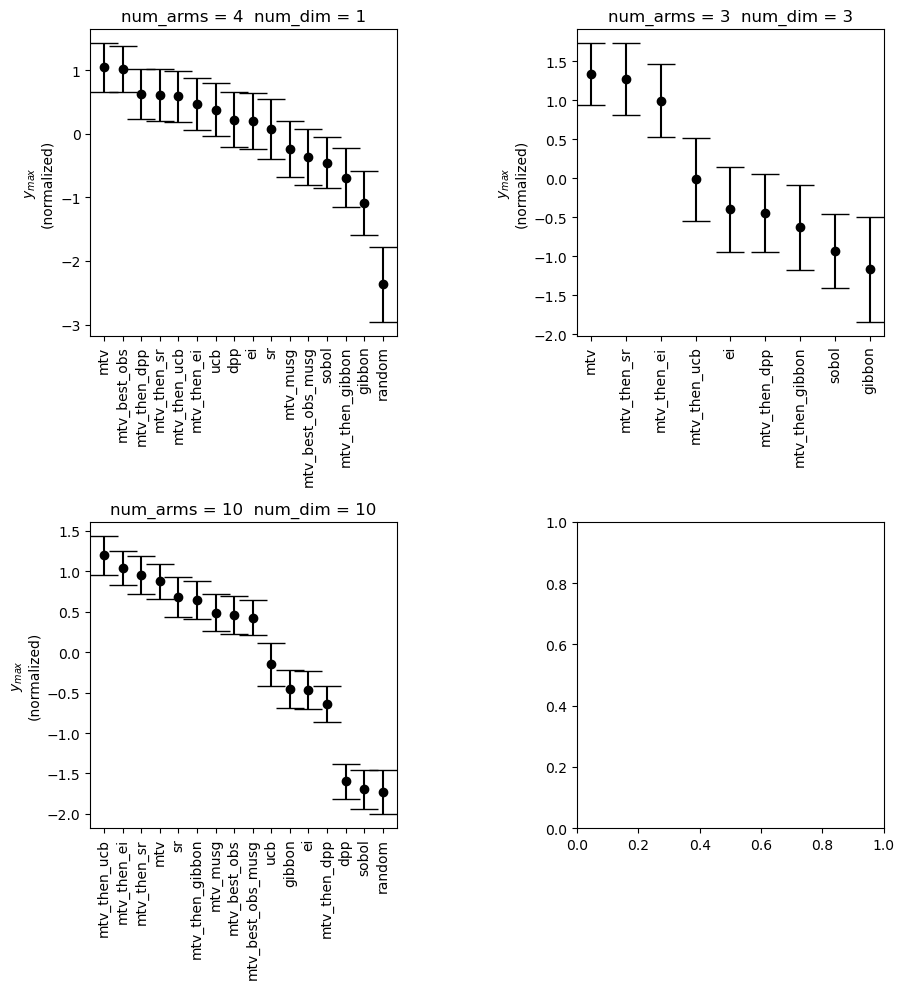

In [12]:
i_agg = -1
axs = ap.subplots(2, 2, figsize=10)
plot_compare(axs[0], "exp_2_mtv_1d_b", num_arms=4, num_dim=1, i_agg=i_agg)
plot_compare(axs[1], "exp_2_mtv_3d_b", num_arms=3, num_dim=3, i_agg=i_agg)
plot_compare(axs[2], "exp_2_mtv_10d_b", num_arms=10, num_dim=10, i_agg=i_agg)
# plot_compare(axs[2], "exp_2_mtv_30d_b", num_arms=30, num_dim=30, i_agg=i_agg)
ap.tight(axs)
plt.show()

## Fig Ablate

In [23]:
def plot_ablate(ax, exp_name, num_arms, num_dim, i_agg):
# TODO: add "use random batch_initial_conditions"

    optimizers = [
        "random",
        'ei_c',
        'ucb_c',
        'mtv_no-opt',
        'mtv_no-ic',
        'mtv_no-pmax',
        'mtv',
#         'mtv_sr',
        'mtv_ei',
        'mtv_ucb',
        'mtv_then_ei',
        'mtv_then_ucb',
        "mtv_no-len-corr",
        'dpp_c'
    ]
    
    plot_perf(ax, exp_name, optimizers, num_arms, num_dim, i_agg)

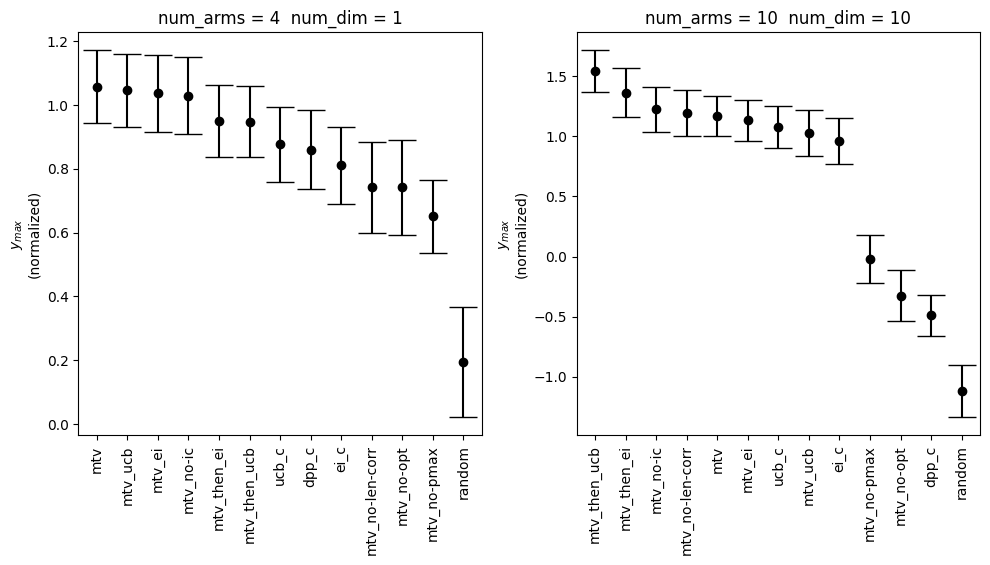

In [24]:
i_agg=-1
axs = ap.subplots(1, 2, figsize=10)
plot_ablate(axs[0], "exp_2_mtv_1d", num_arms=4, num_dim=1, i_agg=i_agg)
plot_ablate(axs[1], "exp_2_mtv_10d", num_arms=10, num_dim=10, i_agg=i_agg)
ap.tight(axs)
plt.show()

In [120]:
optimizers = [
        'ei_c',
        'ucb_c',
        'mtv_no-opt',
        'mtv_no-ic',
        'mtv_no-pmax',
        'mtv',
        'mtv_ei',
        'mtv_ucb',
    ]
exp_tag = "exp_2_mtv_10d"
problems = ads.problems_in(exp_tag)

In [127]:
ads.load_rank_summary(exp_tag, "f:sphere-10d", optimizers, data_locator)

{'ei_c': (4.08, 1.4538225476309004),
 'ucb_c': (5.84, 1.671645895517349),
 'mtv_no-opt': (1.815, 1.1697328754891008),
 'mtv_no-ic': (5.77, 1.7196220514985259),
 'mtv_no-pmax': (1.91, 1.2090905673273615),
 'mtv': (5.58, 1.898315042346765),
 'mtv_ei': (5.425, 1.8115946014492315),
 'mtv_ucb': (5.58, 1.9296631830451658)}

{'ei_c': (4.63708494731605, 2.407093966807223),
 'ucb_c': (5.161585334483052, 3.0116274336337194),
 'mtv_no-opt': (1.8335476592538296, 0.4168963351702566),
 'mtv_no-ic': (5.383004071827596, 3.2349371932671778),
 'mtv_no-pmax': (2.4375937720611387, 0.6882653752417538),
 'mtv': (5.281212919542356, 3.1203958927410254),
 'mtv_ei': (5.0366871710160535, 2.8433898291562105),
 'mtv_ucb': (5.053383559828037, 2.849247206766517)}

mtv_50 beat mtv

You can find the results in results_old_3. "mtv" no refers to what was mtv_50.

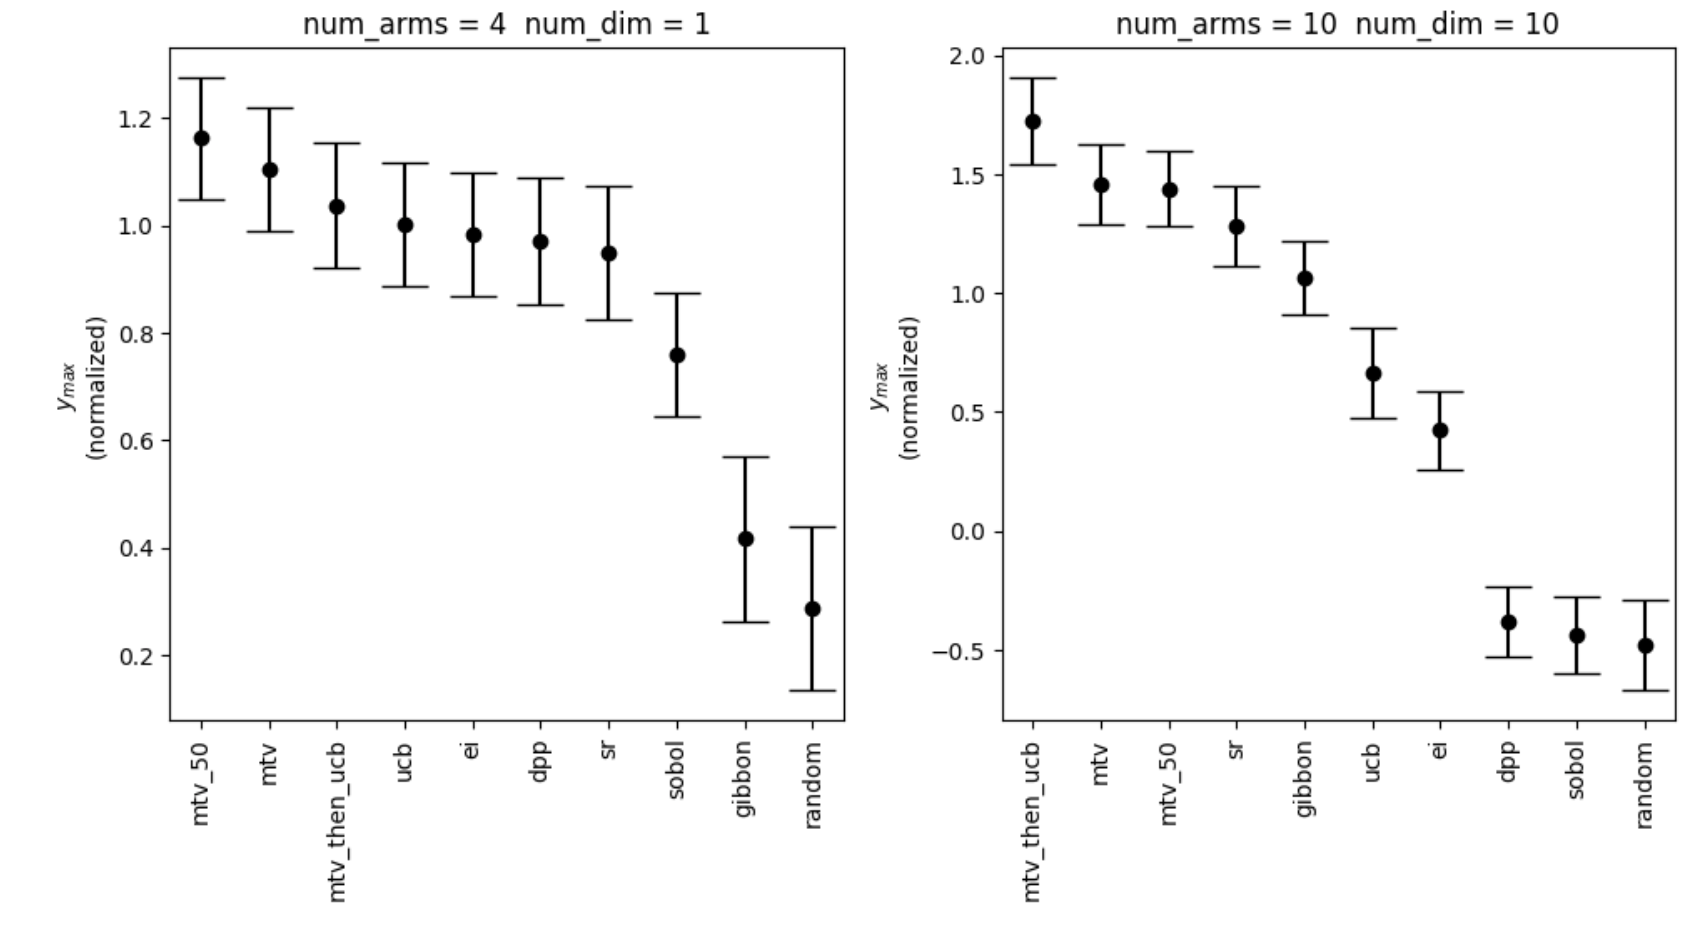

In [67]:
import os
from glob import glob

In [75]:
for arm in [1,2,3,10,1030]:
    for opt in ["mtv","random","sobol"]:
        path =glob(f'results/100dimension_test/plot_100d_{arm}arm/**/{opt}')
        print(path)
        # des = glob(f'100dimension_test/plot_100d_{arm}arm/**/{opt}_{arm}arm')
        for fr in path:
            print(fr)
            src = fr
            des = f"{src}_{arm}arm"
            print(des)
            os.rename(src, des)

['results/100dimension_test/plot_100d_30arm/f:levy-100d/mtv', 'results/100dimension_test/plot_100d_30arm/f:rosenbrock-100d/mtv', 'results/100dimension_test/plot_100d_30arm/f:michalewicz-100d/mtv', 'results/100dimension_test/plot_100d_30arm/f:rastrigin-100d/mtv', 'results/100dimension_test/plot_100d_30arm/f:griewank-100d/mtv', 'results/100dimension_test/plot_100d_30arm/f:ackley-100d/mtv', 'results/100dimension_test/plot_100d_30arm/f:sphere-100d/mtv', 'results/100dimension_test/plot_100d_30arm/f:stybtang-100d/mtv', 'results/100dimension_test/plot_100d_30arm/f:dixonprice-100d/mtv']
results/100dimension_test/plot_100d_30arm/f:levy-100d/mtv
results/100dimension_test/plot_100d_30arm/f:levy-100d/mtv_30arm
results/100dimension_test/plot_100d_30arm/f:rosenbrock-100d/mtv
results/100dimension_test/plot_100d_30arm/f:rosenbrock-100d/mtv_30arm
results/100dimension_test/plot_100d_30arm/f:michalewicz-100d/mtv
results/100dimension_test/plot_100d_30arm/f:michalewicz-100d/mtv_30arm
results/100dimension_t

In [23]:
import shutil
source = "results/exp_2_mtv_1d/f:stybtang-1d/mtv_then_ucb"
destion_dir ='results/play/'
os.makedirs(destion_dir, exist_ok=True)

shutil.copy(source, destion_dir)
arm = 1
src = f"{destion_dir}/{os.path.basename(source)}"
des = f"{destion_dir}/{os.path.basename(source)}_{arm}arm"
os.rename(src, des)

In [25]:
# for dim in [1,2,3,10,30,100]:
#     for arm in [1,2,3,10,30,100]:
#         for func in ['ackley', 'dixonprice', 'griewank', 'levy', 'michalewicz', 'rastrigin', 'rosenbrock', 'sphere', 'stybtang']:
#             for opt in ['sobol','random','mtv']:
#                 source = f"results/exp_2_plots/plot_{dim}d_{arm}arm/f:{func}-{dim}d/{opt}"
#                 destion_dir = f"results/mixture/{dim}d/f:{func}-{dim}d/"
#                 os.makedirs(destion_dir, exist_ok=True)
#                 try:
#                     shutil.copy(source, destion_dir)
#                     src = f"{destion_dir}/{os.path.basename(source)}"
#                     des = f"{destion_dir}/{os.path.basename(source)}_{arm}arm"
#                     os.rename(src, des)
#                 except:
#                     print("Unable to copy:", source)
# print("Finish")

Unable to copy: results/exp_2_plots/plot_1d_1arm/f:michalewicz-1d/sobol
Unable to copy: results/exp_2_plots/plot_1d_1arm/f:michalewicz-1d/random
Unable to copy: results/exp_2_plots/plot_1d_1arm/f:michalewicz-1d/mtv
Unable to copy: results/exp_2_plots/plot_1d_1arm/f:rosenbrock-1d/sobol
Unable to copy: results/exp_2_plots/plot_1d_1arm/f:rosenbrock-1d/random
Unable to copy: results/exp_2_plots/plot_1d_1arm/f:rosenbrock-1d/mtv
Unable to copy: results/exp_2_plots/plot_1d_2arm/f:michalewicz-1d/sobol
Unable to copy: results/exp_2_plots/plot_1d_2arm/f:michalewicz-1d/random
Unable to copy: results/exp_2_plots/plot_1d_2arm/f:michalewicz-1d/mtv
Unable to copy: results/exp_2_plots/plot_1d_2arm/f:rosenbrock-1d/sobol
Unable to copy: results/exp_2_plots/plot_1d_2arm/f:rosenbrock-1d/random
Unable to copy: results/exp_2_plots/plot_1d_2arm/f:rosenbrock-1d/mtv
Unable to copy: results/exp_2_plots/plot_1d_3arm/f:michalewicz-1d/sobol
Unable to copy: results/exp_2_plots/plot_1d_3arm/f:michalewicz-1d/random
U

In [9]:
# import os
# import shutil

# for dim in [1,3,10,30,100]:
#     for arm in [1,3,10,30,100]:
#         for func in ['ackley', 'dixonprice', 'griewank', 'levy', 'michalewicz', 'rastrigin', 'rosenbrock', 'sphere', 'stybtang']:
#             for opt in ['sobol','random','mtv']:
#                 source = f"results/exp_2_figure/plot_{dim}d_{arm}arm/f:{func}-{dim}d/{opt}"
#                 destion_dir = f"results/mixture_100iter/{dim}d/f:{func}-{dim}d/"
#                 os.makedirs(destion_dir, exist_ok=True)
#                 try:
#                     shutil.copy(source, destion_dir)
#                     src = f"{destion_dir}/{os.path.basename(source)}"
#                     des = f"{destion_dir}/{os.path.basename(source)}_{arm}arm"
#                     os.rename(src, des)
#                 except:
#                     print("Unable to copy:", source)
# print("Finish")

Unable to copy: results/exp_2_figure/plot_1d_1arm/f:michalewicz-1d/sobol
Unable to copy: results/exp_2_figure/plot_1d_1arm/f:michalewicz-1d/random
Unable to copy: results/exp_2_figure/plot_1d_1arm/f:michalewicz-1d/mtv
Unable to copy: results/exp_2_figure/plot_1d_1arm/f:rosenbrock-1d/sobol
Unable to copy: results/exp_2_figure/plot_1d_1arm/f:rosenbrock-1d/random
Unable to copy: results/exp_2_figure/plot_1d_1arm/f:rosenbrock-1d/mtv
Unable to copy: results/exp_2_figure/plot_1d_3arm/f:michalewicz-1d/sobol
Unable to copy: results/exp_2_figure/plot_1d_3arm/f:michalewicz-1d/random
Unable to copy: results/exp_2_figure/plot_1d_3arm/f:michalewicz-1d/mtv
Unable to copy: results/exp_2_figure/plot_1d_3arm/f:rosenbrock-1d/sobol
Unable to copy: results/exp_2_figure/plot_1d_3arm/f:rosenbrock-1d/random
Unable to copy: results/exp_2_figure/plot_1d_3arm/f:rosenbrock-1d/mtv
Unable to copy: results/exp_2_figure/plot_1d_10arm/f:michalewicz-1d/sobol
Unable to copy: results/exp_2_figure/plot_1d_10arm/f:michale